## Twitter Sentimental Analysis
This notebook takes you to various steps involved in the Sentimental Analysis of India vs Pakistan cricket match 

1.Authentication of twitter API 

2.Scrapping tweets

3.EDA of tweets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy

In [4]:
with open('api.txt','r') as file:
    text = file.read().split('\n')

In [5]:
len(text)

5

### Authentication

In [6]:
#importing the keys for the API
consumer_key = text[1].split(' ')[2]
consumer_secret =text[2].split(' ')[2]
access_token = text[3].split(' ')[2]
access_secret = text[4].split(' ')[2]

In [8]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

### Scrapping the tweets

In [9]:
cricket_tweets = tweepy.Cursor(api.search_tweets,q=" IndVsPak OR indvspak OR INDVSPAK OR INDVsPak -filter:retweets",
                                lang = "en",show_user = True,tweet_mode = "extended").items(1000)
cricket_tweets_list = [[tweet.created_at, tweet.place, tweet.user.name,tweet.full_text] for tweet in cricket_tweets]


Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpected parameter: show_user
Unexpect

In [10]:
print(len(cricket_tweets_list))

656


In [11]:
cricket_tweets_list[0]

[datetime.datetime(2021, 11, 12, 15, 37, 15, tzinfo=datetime.timezone.utc),
 None,
 'Vishant Mittal',
 '(in my best chadwick baseman voice)Get this man @MatthewWade13 an IPL contract #PAKVSAUS#INDVSPAK#IPL#BCCI#INDIA#AUSTRAILIA']

### Converting the scrapped tweets into a dataframe

In [12]:
tweets_df = pd.DataFrame(cricket_tweets_list)
tweets_df.head()

,0,1,2,3
0,2021-11-12 15:37:15+00:00,None,Vishant Mittal,(in my best chadwick baseman voice)Get this ma...
1,2021-11-12 15:23:16+00:00,None,FirstSportz,India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥\n\n#Indi...
2,2021-11-12 14:45:16+00:00,None,Samiya Javaid,#PAKVSAUS #ShaheenShahAfridi #Hasan_Ali #Babar...
3,2021-11-12 14:24:58+00:00,None,ShruTim Paine 🇦🇺,@CricCrazyJohns @cricketpun_duh @Carpo34 Just ...
4,2021-11-12 14:18:58+00:00,None,rakesh murthy,@iramizraja are you still busy adding zeroes i...


In [13]:
tweets_df.columns = ['Created_at','Place','User','Text']
tweets_df.head()

,Created_at,Place,User,Text
0,2021-11-12 15:37:15+00:00,None,Vishant Mittal,(in my best chadwick baseman voice)Get this ma...
1,2021-11-12 15:23:16+00:00,None,FirstSportz,India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥\n\n#Indi...
2,2021-11-12 14:45:16+00:00,None,Samiya Javaid,#PAKVSAUS #ShaheenShahAfridi #Hasan_Ali #Babar...
3,2021-11-12 14:24:58+00:00,None,ShruTim Paine 🇦🇺,@CricCrazyJohns @cricketpun_duh @Carpo34 Just ...
4,2021-11-12 14:18:58+00:00,None,rakesh murthy,@iramizraja are you still busy adding zeroes i...


### Saving as csv

In [14]:
tweets_df.to_csv('tweets.csv',index= False)

### Hashtag analysis


In [15]:
import re

def find_hashtags(tweet):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
                      
tweets_df['hashtags']= tweets_df.Text.apply(find_hashtags)

In [16]:
tweets_df.head()

,Created_at,Place,User,Text,hashtags
0,2021-11-12 15:37:15+00:00,None,Vishant Mittal,(in my best chadwick baseman voice)Get this ma...,"[#PAKVSAUS, #INDVSPAK, #IPL, #BCCI, #INDIA, #A..."
1,2021-11-12 15:23:16+00:00,None,FirstSportz,India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥\n\n#Indi...,"[#India, #Pakistan, #IndVsPak, #Commonwealth, ..."
2,2021-11-12 14:45:16+00:00,None,Samiya Javaid,#PAKVSAUS #ShaheenShahAfridi #Hasan_Ali #Babar...,"[#PAKVSAUS, #ShaheenShahAfridi, #Hasan_Ali, #B..."
3,2021-11-12 14:24:58+00:00,None,ShruTim Paine 🇦🇺,@CricCrazyJohns @cricketpun_duh @Carpo34 Just ...,[]
4,2021-11-12 14:18:58+00:00,None,rakesh murthy,@iramizraja are you still busy adding zeroes i...,"[#IndVsPak, #PAKVSAUS, #T20WorldCup2021, #Worl..."


In [17]:
tweets_df.hashtags[2]

['#PAKVSAUS',
 '#ShaheenShahAfridi',
 '#Hasan_Ali',
 '#BabarAzam',
 '#T20WorldCup',
 '#India',
 '#IndiaVsPak',
 '#Indian',
 '#IndVsPak']

In [18]:
tweets_df.hashtags

0      [#PAKVSAUS, #INDVSPAK, #IPL, #BCCI, #INDIA, #A...
1      [#India, #Pakistan, #IndVsPak, #Commonwealth, ...
2      [#PAKVSAUS, #ShaheenShahAfridi, #Hasan_Ali, #B...
3                                                     []
4      [#IndVsPak, #PAKVSAUS, #T20WorldCup2021, #Worl...
                             ...                        
651                                          [#INDvsPAK]
652                     [#gaddar, #TeamIndia, #IndvsPak]
653                               [#IndvsPak, #AFGVSIND]
654                                          [#IndVsPak]
655                                     [#WhatAComeback]
Name: hashtags, Length: 656, dtype: object

In [19]:
hashtag_list = tweets_df['hashtags'].to_list()
flat_hashtags_df = pd.DataFrame([item for sublist in hashtag_list for item in sublist])
flat_hashtags_df.shape

(2230, 1)

In [20]:
flat_hashtags_df[:5]

,0
0,#PAKVSAUS
1,#INDVSPAK
2,#IPL
3,#BCCI
4,#INDIA


In [27]:
flat_hashtags_df.columns =['hashtags']

In [24]:
print("Total Hashtags",len(flat_hashtags_df))


Total Hashtags 2230


In [30]:
print("Repeated Hashtags", len(flat_hashtags_df['hashtags'].unique()))

Repeated Hashtags 556


### Plot of 20 most popular hashtags

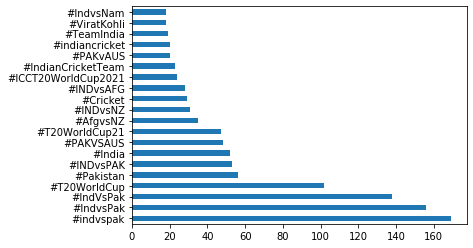

In [31]:

flat_hashtags_df['hashtags'].value_counts()[:20].plot(kind='barh')

### Cleaning the tweets for further analysis

In [32]:
#define a function to clean up the tweets. input - text field of all #the rows, output - cleaned text 
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#[A-Za-z0-9_]+', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    #remove amp
    txt = re.sub(r'&amp;', '', txt)
    #rempve strange characters
    txt = re.sub(r'ðŸ™', '', txt)
    #remove new lines
    txt = re.sub(r'\n', ' ', txt)
    return txt
tweets_df['Cleaned_Text'] = tweets_df['Text'].apply(cleanUpTweet)

In [33]:
tweets_df.head()

,Created_at,Place,User,Text,hashtags,Cleaned_Text
0,2021-11-12 15:37:15+00:00,None,Vishant Mittal,(in my best chadwick baseman voice)Get this ma...,"[#PAKVSAUS, #INDVSPAK, #IPL, #BCCI, #INDIA, #A...",(in my best chadwick baseman voice)Get this ma...
1,2021-11-12 15:23:16+00:00,None,FirstSportz,India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥\n\n#Indi...,"[#India, #Pakistan, #IndVsPak, #Commonwealth, ...",India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥
2,2021-11-12 14:45:16+00:00,None,Samiya Javaid,#PAKVSAUS #ShaheenShahAfridi #Hasan_Ali #Babar...,"[#PAKVSAUS, #ShaheenShahAfridi, #Hasan_Ali, #B...",To All Haters. To every nonsense trol...
3,2021-11-12 14:24:58+00:00,None,ShruTim Paine 🇦🇺,@CricCrazyJohns @cricketpun_duh @Carpo34 Just ...,[],"Just out of curiosity, which team were you ..."
4,2021-11-12 14:18:58+00:00,None,rakesh murthy,@iramizraja are you still busy adding zeroes i...,"[#IndVsPak, #PAKVSAUS, #T20WorldCup2021, #Worl...",are you still busy adding zeroes in that Blan...


In [34]:
tweets_df['text_len'] = tweets_df['Text'].astype(str).apply(len)
tweets_df['word_count'] = tweets_df['Text'].apply(lambda x:len(str(x).split()))

In [35]:
tweets_df.head()

,Created_at,Place,User,Text,hashtags,Cleaned_Text,text_len,word_count
0,2021-11-12 15:37:15+00:00,None,Vishant Mittal,(in my best chadwick baseman voice)Get this ma...,"[#PAKVSAUS, #INDVSPAK, #IPL, #BCCI, #INDIA, #A...",(in my best chadwick baseman voice)Get this ma...,123,13
1,2021-11-12 15:23:16+00:00,None,FirstSportz,India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥\n\n#Indi...,"[#India, #Pakistan, #IndVsPak, #Commonwealth, ...",India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥,119,13
2,2021-11-12 14:45:16+00:00,None,Samiya Javaid,#PAKVSAUS #ShaheenShahAfridi #Hasan_Ali #Babar...,"[#PAKVSAUS, #ShaheenShahAfridi, #Hasan_Ali, #B...",To All Haters. To every nonsense trol...,195,22
3,2021-11-12 14:24:58+00:00,None,ShruTim Paine 🇦🇺,@CricCrazyJohns @cricketpun_duh @Carpo34 Just ...,[],"Just out of curiosity, which team were you ...",131,15
4,2021-11-12 14:18:58+00:00,None,rakesh murthy,@iramizraja are you still busy adding zeroes i...,"[#IndVsPak, #PAKVSAUS, #T20WorldCup2021, #Worl...",are you still busy adding zeroes in that Blan...,119,16


In [36]:
tweets_df['text_len'].max(),tweets_df['text_len'].min(),round(tweets_df['text_len'].mean())

(420, 24, 176)

In [37]:
tweets_df['word_count'].max(),tweets_df['word_count'].min(),round(tweets_df['word_count'].mean())

(60, 3, 26)

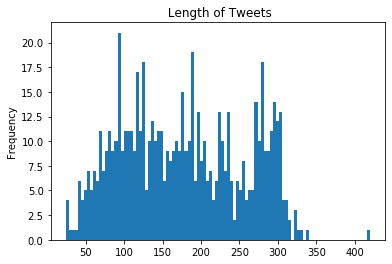

In [38]:
tweets_df['text_len'].plot(bins=100,kind='hist',title=' Length of Tweets')


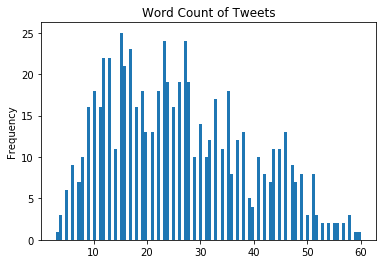

In [39]:
tweets_df['word_count'].plot(bins = 100, kind = 'hist', title = 'Word Count of Tweets')

### Sentimental Analysis

In [40]:
import nltk
nltk.download('vader_lexicon') 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem  import PorterStemmer
ps = PorterStemmer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aravind\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
for index, row in tweets_df['Text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['neg'] > score['pos']:
        tweets_df.loc[index, "Sentiment"] = "negative"
    elif score['pos'] > score['neg']:
        tweets_df.loc[index, "Sentiment"] = "positive"
    else:
        tweets_df.loc[index, "Sentiment"] = "neutral"
        
    tweets_df.loc[index, 'neg'] = score['neg']
    tweets_df.loc[index, 'neu'] = score['neu']
    tweets_df.loc[index, 'pos'] = score['pos']
    tweets_df.loc[index, 'compound'] = score['compound']
    


In [42]:
tweets_df.head()

,Created_at,Place,User,Text,hashtags,Cleaned_Text,text_len,word_count,Sentiment,neg,neu,pos,compound
0,2021-11-12 15:37:15+00:00,None,Vishant Mittal,(in my best chadwick baseman voice)Get this ma...,"[#PAKVSAUS, #INDVSPAK, #IPL, #BCCI, #INDIA, #A...",(in my best chadwick baseman voice)Get this ma...,123,13,positive,0.000,0.741,0.259,0.6369
1,2021-11-12 15:23:16+00:00,None,FirstSportz,India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥\n\n#Indi...,"[#India, #Pakistan, #IndVsPak, #Commonwealth, ...",India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥,119,13,neutral,0.000,1.000,0.000,0.0000
2,2021-11-12 14:45:16+00:00,None,Samiya Javaid,#PAKVSAUS #ShaheenShahAfridi #Hasan_Ali #Babar...,"[#PAKVSAUS, #ShaheenShahAfridi, #Hasan_Ali, #B...",To All Haters. To every nonsense trol...,195,22,negative,0.228,0.772,0.000,-0.7096
3,2021-11-12 14:24:58+00:00,None,ShruTim Paine 🇦🇺,@CricCrazyJohns @cricketpun_duh @Carpo34 Just ...,[],"Just out of curiosity, which team were you ...",131,15,positive,0.000,0.828,0.172,0.4404
4,2021-11-12 14:18:58+00:00,None,rakesh murthy,@iramizraja are you still busy adding zeroes i...,"[#IndVsPak, #PAKVSAUS, #T20WorldCup2021, #Worl...",are you still busy adding zeroes in that Blan...,119,16,neutral,0.000,1.000,0.000,0.0000


In [43]:
tweet_neg = tweets_df[tweets_df["Sentiment"]=="negative"]
tweet_neu = tweets_df[tweets_df["Sentiment"] == "neutral"]
tweet_pos = tweets_df[tweets_df["Sentiment"] == "positive"]

def percentage(x,y):
    return 100*x/y

pos_per = percentage(len(tweet_pos), len(tweets_df))
neg_per = percentage(len(tweet_neg), len(tweets_df))
neu_per = percentage(len(tweet_neu), len(tweets_df))

print("positive: {} {}%".format(len(tweet_pos),  format(pos_per, '.1f')))
print("negative: {} {}%".format(len(tweet_neg), format(neg_per, '.1f')))
print("neutral: {} {}%".format(len(tweet_neu),format(neu_per, '.1f')))

positive: 340 51.8%
negative: 136 20.7%
neutral: 180 27.4%


In [44]:
tweets_df.groupby('Sentiment').count()

,Created_at,Place,User,Text,hashtags,Cleaned_Text,text_len,word_count,neg,neu,pos,compound
Sentiment,,,,,,,,,,,,
negative,136,2,136,136,136,136,136,136,136,136,136,136
neutral,180,6,180,180,180,180,180,180,180,180,180,180
positive,340,13,340,340,340,340,340,340,340,340,340,340


In [45]:
tweets_df.groupby('Sentiment').count().index.values

array(['negative', 'neutral', 'positive'], dtype=object)

In [46]:
tweets_df.groupby('Sentiment').size()

Sentiment
negative    136
neutral     180
positive    340
dtype: int64

In [47]:
tweets_df.groupby('Sentiment').size().values


array([136, 180, 340], dtype=int64)

<BarContainer object of 3 artists>

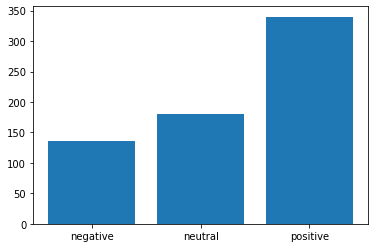

In [48]:
labels = tweets_df.groupby('Sentiment').count().index.values
values = tweets_df.groupby('Sentiment').size().values
plt.bar(labels, values)

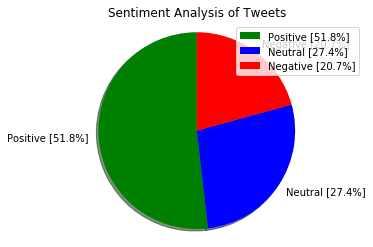

In [49]:
labels = ['Positive ['+format(pos_per, '.1f')+'%]', 'Neutral ['+format(neu_per,'.1f')+'%]', 'Negative ['+format(neg_per,'.1f')+'%]']
sizes = [len(tweet_pos), len(tweet_neu), len(tweet_neg)]
colors = ['green', 'blue', 'red']
patches, texts = plt.pie(sizes, labels = labels, colors = colors,shadow = True, startangle = 90)
plt.legend(labels)
plt.title("Sentiment Analysis of Tweets")
plt.axis('equal')
plt.show()

In [50]:
from wordcloud import WordCloud,STOPWORDS

def create_word_cloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",max_words=3000,stopwords=stopwords,repeat=True)
    wc.generate(str(text))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

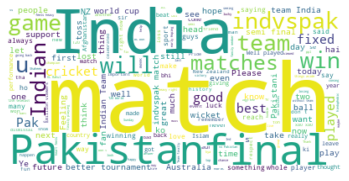

In [51]:
create_word_cloud(tweet_pos["Cleaned_Text"].values)    

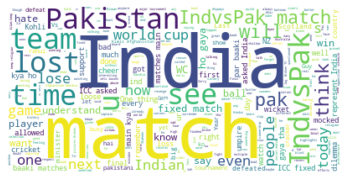

In [52]:
create_word_cloud(tweet_neg["Cleaned_Text"].values)    

### Preprocessing text 

In [54]:
#Apply tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweets_df['tokenized'] = tweets_df['Cleaned_Text'].apply(lambda x: tokenization(x.lower()))

#Removing Stop words
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

tweets_df['nonstop'] = tweets_df['tokenized'].apply(lambda x:remove_stopwords(x))

#Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweets_df['stemmed'] = tweets_df['nonstop'].apply(lambda x: stemming(x))

#join all the words to make a final text field
tweets_df['preprocess'] = tweets_df['stemmed'].apply(lambda x: ' '.join(x))
tweets_df.head()

,Created_at,Place,User,Text,hashtags,Cleaned_Text,text_len,word_count,Sentiment,neg,neu,pos,compound,tokenized,nonstop,stemmed,preprocess
0,2021-11-12 15:37:15+00:00,None,Vishant Mittal,(in my best chadwick baseman voice)Get this ma...,"[#PAKVSAUS, #INDVSPAK, #IPL, #BCCI, #INDIA, #A...",(in my best chadwick baseman voice)Get this ma...,123,13,positive,0.000,0.741,0.259,0.6369,"[, in, my, best, chadwick, baseman, voice, get...","[, best, chadwick, baseman, voice, get, man, i...","[, best, chadwick, baseman, voic, get, man, ip...",best chadwick baseman voic get man ipl contract
1,2021-11-12 15:23:16+00:00,None,FirstSportz,India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥\n\n#Indi...,"[#India, #Pakistan, #IndVsPak, #Commonwealth, ...",India v Pakistan on 3️⃣1️⃣st July 🇮🇳🔥,119,13,neutral,0.000,1.000,0.000,0.0000,"[india, v, pakistan, on, 3, 1, st, july, ]","[india, v, pakistan, 3, 1, st, july, ]","[india, v, pakistan, 3, 1, st, juli, ]",india v pakistan 3 1 st juli
2,2021-11-12 14:45:16+00:00,None,Samiya Javaid,#PAKVSAUS #ShaheenShahAfridi #Hasan_Ali #Babar...,"[#PAKVSAUS, #ShaheenShahAfridi, #Hasan_Ali, #B...",To All Haters. To every nonsense trol...,195,22,negative,0.228,0.772,0.000,-0.7096,"[, to, all, haters, to, every, nonsense, troll...","[, haters, every, nonsense, troller, watch, hi...","[, hater, everi, nonsens, troller, watch, high...",hater everi nonsens troller watch highlight
3,2021-11-12 14:24:58+00:00,None,ShruTim Paine 🇦🇺,@CricCrazyJohns @cricketpun_duh @Carpo34 Just ...,[],"Just out of curiosity, which team were you ...",131,15,positive,0.000,0.828,0.172,0.4404,"[, just, out, of, curiosity, which, team, were...","[, curiosity, team, supporting, indvspak, ]","[, curios, team, support, indvspak, ]",curios team support indvspak
4,2021-11-12 14:18:58+00:00,None,rakesh murthy,@iramizraja are you still busy adding zeroes i...,"[#IndVsPak, #PAKVSAUS, #T20WorldCup2021, #Worl...",are you still busy adding zeroes in that Blan...,119,16,neutral,0.000,1.000,0.000,0.0000,"[, are, you, still, busy, adding, zeroes, in, ...","[, still, busy, adding, zeroes, blank, cheque, ]","[, still, busi, ad, zero, blank, chequ, ]",still busi ad zero blank chequ


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
CountVector = cv.fit_transform(tweets_df['preprocess'])


In [64]:
print('{} Number of tweets have {}'.format(CountVector.shape[0],CountVector.shape[1]))

656 Number of tweets have 2109


In [66]:
count_vect_df = pd.DataFrame(CountVector.toarray(), columns = cv.get_feature_names())
count_vect_df

,01,10,100,10run,110,12,125,12pm,12run,12th,...,zimbabw,zyada,अफ,उसक,चल,नद,पत,હવ,𝗠𝗢𝗥𝗘,𝗥𝗘𝗔𝗗
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#most frequently used words in the tweets
counts = pd.DataFrame(count_vect_df.sum())
count_df = counts.sort_values(0, ascending = False).head(10)
count_df

,0
match,315
india,181
indvspak,127
team,104
pakistan,103
final,98
world,69
win,64
fix,63
cup,56


Text(0.5, 1.0, 'Top 20 Most frequently used words in the tweets')

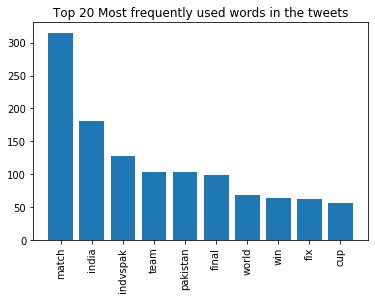

In [68]:
#create a bar graph of most frequently used words
ind = count_df.index
val = [item for sublist in count_df.values for item in sublist]
plt.bar(ind, val)
plt.xticks(rotation = 90)
plt.title('Top 20 Most frequently used words in the tweets')